## Equipo #4 | TC3006C.102

- Karla Andrea Palma Villanueva (A01754270)
- Viviana Alanis Fraige (A01236316)
- David Fernando Armendariz Torres (A01570813)
- Alan Alberto Mota Yescas (A01753924)
- Adrián Chávez Morales (A01568679)
- Jose Manuel Armendáriz Mena (A01197583)

### Prepare Programming Environment

In [208]:
# Import libraries
import pandas as pd # Dataframe management
import re # Regular expressions
import numpy as np # Math 
import matplotlib.pyplot as plt # Plots
import math # Math
import random # Randomness

# Ensure reproducibility
seed = 66
random.seed(seed)
np.random.seed(seed)

In [209]:
# Load dataset
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Exploration / Cleansing / Preprocessing

In [210]:
# Exploration | Verify data was loaded correctly
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [211]:
# Exploration | Visualize target class balance
df["Survived"].value_counts()
proportions = df['Survived'].value_counts(normalize=True)*100
print(proportions)

0    61.616162
1    38.383838
Name: Survived, dtype: float64


In [212]:
# Preporcessing | Extract titles for each passanger and store them in new column
titles = []
for name in df["Name"]:
    titles.append("".join(re.findall(r',([^.]*)\.', name))[1:])
df["Titles"] = titles
df["Titles"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Titles, dtype: int64

In [213]:
# Preprocessing | Group equivalent titles
df['Titles'] = df['Titles'].replace({'Mlle': 'Miss', 'Mme': 'Mrs'})# Mlle -> Miss | Mme -> Mrs
df.loc[df['Titles'] == 'Ms']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0,NaN,S,Ms


In [214]:
# Preprocessing | Group Ms into Miss after reasearching "Ms" passanger
df['Titles'] = df['Titles'].replace({'Ms': 'Miss'})
"""
Encarnación Reynaldo: Titanic Survivor. (1996, September 1). Encyclopedia Titanica. https://www.encyclopedia-titanica.org/titanic-survivor/encarnacion-reynaldo.html
"""

'\nEncarnación Reynaldo: Titanic Survivor. (1996, September 1). Encyclopedia Titanica. https://www.encyclopedia-titanica.org/titanic-survivor/encarnacion-reynaldo.html\n'

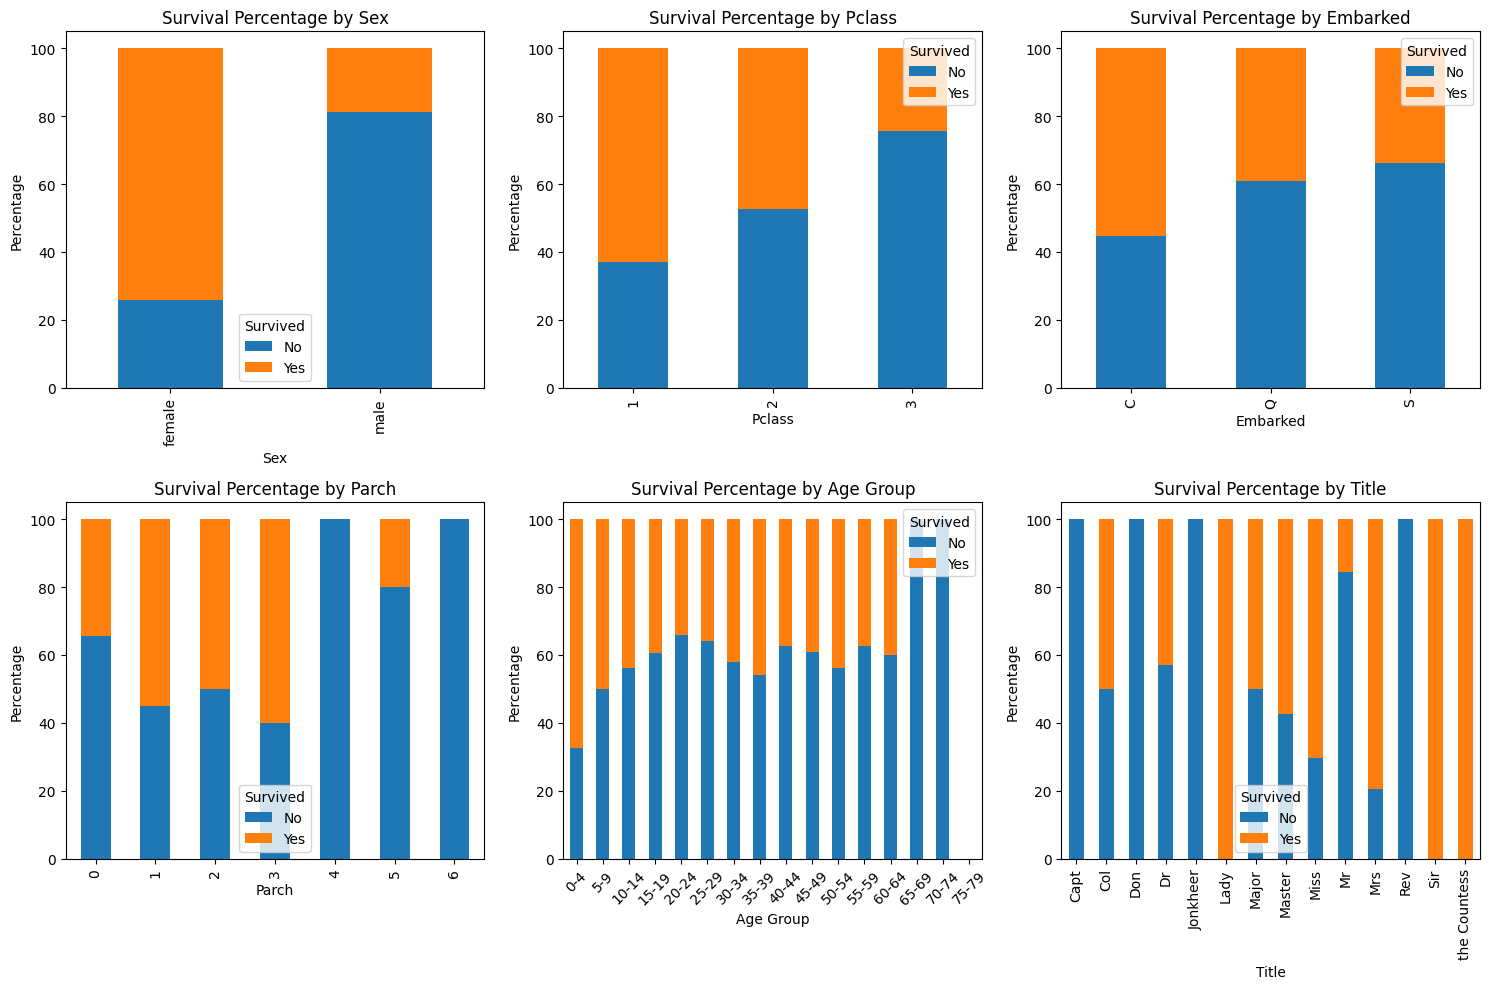

In [215]:
# Exploration | Plot survival rates per seemingly relevant variable.
## Create age bins
bins = range(0, 85, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

## Function | Calulcate survival rates
def calculate_percentages(data, column):
    counts = data.groupby([column, 'Survived']).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    return percentages

## Calculate rates for each feature
sex_percentages = calculate_percentages(df, 'Sex')
pclass_percentages = calculate_percentages(df, 'Pclass')
parch_percentages = calculate_percentages(df, 'Parch')
age_group_percentages = calculate_percentages(df, 'AgeGroup')
embarked_percentages = calculate_percentages(df, 'Embarked')
titles_percentages = calculate_percentages(df, 'Titles')

## Create a 2x3 subplot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

## Plot 1: Sex
sex_percentages.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Survival Percentage by Sex')
axes[0, 0].set_xlabel('Sex')
axes[0, 0].set_ylabel('Percentage')
axes[0, 0].legend(title='Survived', labels=['No', 'Yes'])

## Plot 2: Pclass
pclass_percentages.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Survival Percentage by Pclass')
axes[0, 1].set_xlabel('Pclass')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].legend(title='Survived', labels=['No', 'Yes'])

## Plot 3: Parch
parch_percentages.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Survival Percentage by Parch')
axes[1, 0].set_xlabel('Parch')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].legend(title='Survived', labels=['No', 'Yes'])

## Plot 4: Age Group
age_group_percentages.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Survival Percentage by Age Group')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].legend(title='Survived', labels=['No', 'Yes'])
axes[1, 1].tick_params(axis='x', rotation=45)

## Plot 5: Embarked
embarked_percentages.plot(kind='bar', stacked=True, ax=axes[0, 2])
axes[0, 2].set_title('Survival Percentage by Embarked')
axes[0, 2].set_xlabel('Embarked')
axes[0, 2].set_ylabel('Percentage')
axes[0, 2].legend(title='Survived', labels=['No', 'Yes'])

## Plot 6: Titles
titles_percentages.plot(kind='bar', stacked=True, ax=axes[1, 2])
axes[1, 2].set_title('Survival Percentage by Title')
axes[1, 2].set_xlabel('Title')
axes[1, 2].set_ylabel('Percentage')
axes[1, 2].legend(title='Survived', labels=['No', 'Yes'])

## Plot
plt.tight_layout()
plt.show()

In [216]:
# Exploration | Identify NaN in Embarked
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,AgeGroup
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,35-39
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,60-64


In [217]:
# Cleansing | Preliminar Nan handling in Embarked:  Replace with real researched data.
df['Embarked'].fillna('S', inplace=True)
df.info()
"""
Martha Evelyn Stone: Titanic Survivor. (1996, September 1). Encyclopedia Titanica. https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html
Rose Amélie Icard: Titanic Survivor. (1996, September 1). Encyclopedia Titanica. https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  Titles       891 non-null    object  
 13  AgeGroup     713 non-null    category
dtypes: category(1), float64(2), int64(5), object(6)
memory usage: 92.2+ KB


'\nMartha Evelyn Stone: Titanic Survivor. (1996, September 1). Encyclopedia Titanica. https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html\nRose Amélie Icard: Titanic Survivor. (1996, September 1). Encyclopedia Titanica. https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html\n'

In [218]:
# Cleansing | Feature removal
df.drop("Cabin", axis = 1, inplace = True) # Drop due to excesive amount of NaNs
df.drop("Ticket", axis = 1, inplace = True) # Drop due to to management difficulty
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    object  
 10  Titles       891 non-null    object  
 11  AgeGroup     713 non-null    category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 78.2+ KB


**Categorical Data:**
- Pclass: Ordinal
- Sex: Binary
- Embarked: Nominal
- Titles: Nominal

In [219]:
# Preprocessing | Categorical data handling
from sklearn.preprocessing import LabelEncoder

## Binary data: Label Encoding
leS = LabelEncoder()
df["Sex"] = leS.fit_transform(df["Sex"]) # 1: male, 2: female

## Re order Pclass | 1: lower, 2: medium, 3: upper
df['Pclass'] = df['Pclass'].replace({1: 'upper', 2: 'medium', 3: 'lower'})
df['Pclass'] = df['Pclass'].replace({'upper': 3, 'medium': 2, 'lower': 1})

## Nominal data: One hot encoding
### Embarked
embarked = pd.get_dummies(df['Embarked'])
df = pd.concat([df, embarked], axis = 1)
df.drop('Embarked', axis=1, inplace=True)

### Title
title_mapping = { # CST: Common Title, PT: Professional Title, NT: Nobiliy Titles, MT: MIllitary Titles
    'Mr': 'CT',
    'Miss': 'CT',
    'Mrs': 'CT',
    'Ms': 'CT',
    'Dr': 'PT',
    'Rev': 'PT',
    'the Countess': 'NT',
    'Sir': 'NT',
    'Lady': 'NT',
    'Don': 'NT',
    'Jonkheer': 'NT',
    'Major': 'MT',
    'Col': 'MT',
    'Capt': 'MT',
    'Master': 'CT',
    'Mlle': 'CT',
    'Mme': 'CT'
}
# Group titles
titles_mapped = pd.get_dummies(df['Titles'].replace(title_mapping))
df = pd.concat([df, titles_mapped], axis = 1) # .iloc[:, :-1]

In [220]:
# Exploration | Identify significant features
"""
A logistic regression model is trained on all variables, and those without significant impact, meaning a low coefficient, on 
the dataset are discarded or transformed.
"""

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

## Drop missing values
df_de = df.dropna()

## Data separation and segmentation
X = df_de.drop(columns=[df_de.columns[0], 'Titles', 'Survived', 'AgeGroup', 'Name'])
y = df_de.iloc[:, 1]
columns_to_standardize = ["Age", 'Parch', 'SibSp']
scaler = StandardScaler()
X[columns_to_standardize] = scaler.fit_transform(X[columns_to_standardize])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = seed)

## Initialize and train the logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

## Predict on the test set
y_pred = model.predict(X_test)

## Calculate the F1 score
f1 = f1_score(y_test, y_pred)

## Obtain and rank the coefficeints
coefficients = model.coef_[0]
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

## Display the results
print(f"F1 Score: {f1}")
print(coef_df[['Feature', 'Coefficient']])

F1 Score: 0.7826086956521738
   Feature  Coefficient
1      Sex    -2.317112
0   Pclass     1.059715
2      Age    -0.641752
3    SibSp    -0.401230
7        Q    -0.336596
10      MT     0.303799
12      PT    -0.280902
6        C     0.237739
11      NT    -0.236133
9       CT     0.208747
8        S     0.094367
4    Parch     0.052758
5     Fare     0.003009


In [221]:
# Cleansing | Remove features
df.drop("Fare", axis = 1, inplace = True) # Drop due to low significance
df.drop("S", axis = 1, inplace = True) # Drop due to low significance and multiollinearity
df.drop("CT", axis = 1, inplace = True) # Drop due to multicollinearity

In [222]:
# Preprocessing | Family Size = Parch + SibSp + current passanger
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df.drop("Parch", axis = 1, inplace = True) # Drop due to redundancy
df.drop("SibSp", axis = 1, inplace = True) # Drop due to redundancy

In [223]:
# Preprocessing | Replace index with PassengerId
df.set_index(df.columns[0], inplace=True)

In [224]:
# Exploration | Identify missing age values per title
nan_age_grouped = df[df['Age'].isna()].groupby('Titles').size()

print(nan_age_grouped)

Titles
Dr          1
Master      4
Miss       36
Mr        119
Mrs        17
dtype: int64


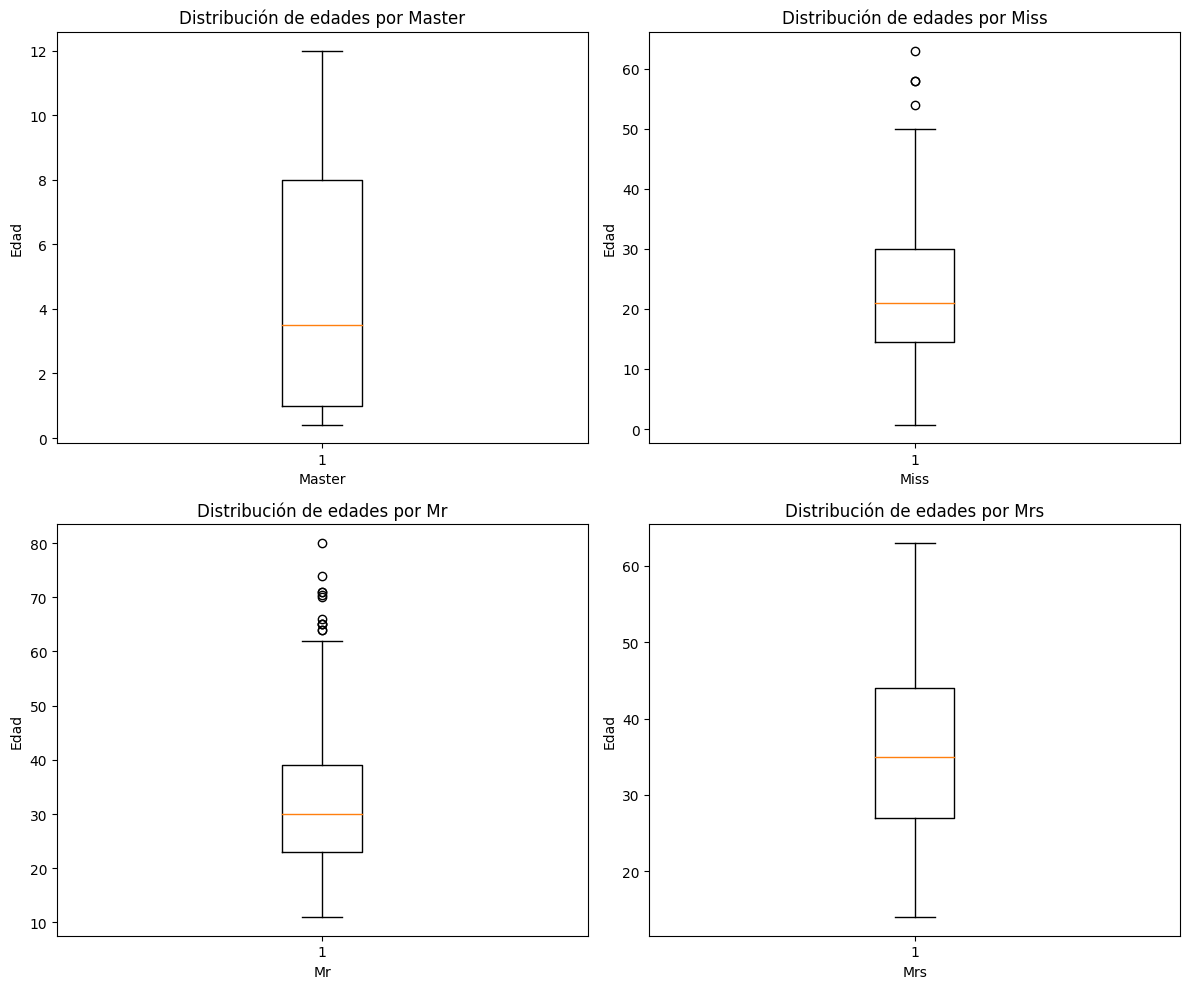

In [225]:
# Data Exploration | Identify outliers in age per titles with missing values
filtered_df = df[df['Titles'].isin(['Master', 'Miss', 'Mr', 'Mrs'])]

## Create a 2x2 grid of boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each title
titles = ['Master', 'Miss', 'Mr', 'Mrs']
for ax, title in zip(axes.flatten(), titles):
    ax.boxplot(filtered_df[filtered_df['Titles'] == title]['Age'].dropna())
    ax.set_title(f'Distribución de edades por {title}')
    ax.set_ylabel('Edad')
    ax.set_xlabel(title)

plt.tight_layout()
plt.show()


In [226]:
# Exploration | Identify measures of centrality of age by title
centrality_measures = df.groupby('Titles')['Age'].agg(['mean', 'median'])

print(centrality_measures)

                   mean  median
Titles                         
Capt          70.000000    70.0
Col           58.000000    58.0
Don           40.000000    40.0
Dr            42.000000    46.5
Jonkheer      38.000000    38.0
Lady          48.000000    48.0
Major         48.500000    48.5
Master         4.574167     3.5
Miss          21.845638    21.0
Mr            32.368090    30.0
Mrs           35.788991    35.0
Rev           43.166667    46.5
Sir           49.000000    49.0
the Countess  33.000000    33.0


In [227]:
# Cleansing | Replace missing age values with measures of centrality
df.loc[(df['Titles'] == 'Master') & (df['Age'].isna()), 'Age'] = 4.6 # Mean
df.loc[(df['Titles'] == 'Miss') & (df['Age'].isna()), 'Age'] = 21.0 # Median
df.loc[(df['Titles'] == 'Mr') & (df['Age'].isna()), 'Age'] = 30.0 # Median
df.loc[(df['Titles'] == 'Mrs') & (df['Age'].isna()), 'Age'] = 35.8 # Mean

In [228]:
# Exploration | Identify Dr title with missing values
missing_values_dr = df.loc[(df['Titles'] == 'Dr') & (df.isna().any(axis=1))]
print(missing_values_dr["Name"])

PassengerId
767    Brewe, Dr. Arthur Jackson
Name: Name, dtype: object


In [229]:
# Cleansing | Replace missing age of Dr. Jackson with researched value
df.loc[df['Titles'] == 'Dr', ['Age']] = df.loc[df['Titles'] == 'Dr', ['Age']].fillna(46)

'''
Arthur Jackson Brewe: Titanic Victim. (1996, September 1). Encyclopedia Titanica. https://www.encyclopedia-titanica.org/titanic-victim/arthur-jackson-brewe.html
'''

'\nArthur Jackson Brewe: Titanic Victim. (1996, September 1). Encyclopedia Titanica. https://www.encyclopedia-titanica.org/titanic-victim/arthur-jackson-brewe.html\n'

In [230]:
df.head()

,Survived,Pclass,Name,Sex,Age,Titles,AgeGroup,C,Q,MT,NT,PT,Family_Size
PassengerId,,,,,,,,,,,,,
1,0,1,"Braund, Mr. Owen Harris",1,22.0,Mr,20-24,0,0,0,0,0,2
2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,Mrs,35-39,1,0,0,0,0,2
3,1,1,"Heikkinen, Miss. Laina",0,26.0,Miss,25-29,0,0,0,0,0,1
4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,Mrs,35-39,0,0,0,0,0,2
5,0,1,"Allen, Mr. William Henry",1,35.0,Mr,35-39,0,0,0,0,0,1


In [231]:
# Preprocessing | Standarize selected features
columns_to_standardize = ["Age", 'Family_Size']
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [232]:
# Preprocessing | Create datasets with selected features
X = df.drop(["Name", "Survived", "AgeGroup", "Titles"], axis = 1).copy()
X.to_csv("X_train_C.csv")
y = pd.DataFrame(df["Survived"])
y.to_csv("y_train_C.csv")

### Test Dataset

In [233]:
# Load dataset
df_test = pd.read_csv("test.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [234]:
# Preporcessing | Extract titles for each passanger and store them in new column
titles_test = []
for name in df_test["Name"]:
    titles_test.append("".join(re.findall(r',([^.]*)\.', name))[1:])
df_test["Titles"] = titles_test

In [235]:
# Cleansing | Feature removal
df_test.drop("Cabin", axis = 1, inplace = True)
df_test.drop("Ticket", axis = 1, inplace = True)

In [236]:
## Binary data: Label Encoding
leS = LabelEncoder()
df_test["Sex"] = leS.fit_transform(df_test["Sex"]) # 1: male, 2: female

## Re order Pclass | 1: lower, 2: medium, 3: upper
df_test['Pclass'] = df_test['Pclass'].replace({1: 'upper', 2: 'medium', 3: 'lower'})
df_test['Pclass'] = df_test['Pclass'].replace({'upper': 3, 'medium': 2, 'lower': 1})

## Nominal data: One hot encoding
### Embarked
embarked_test = pd.get_dummies(df_test['Embarked'])
df_test = pd.concat([df_test, embarked_test], axis = 1)
df_test.drop('Embarked', axis=1, inplace=True)

### Title
title_mapping_test = { # CST: Common Title, PT: Professional Title, NT: Nobiliy Titles, MT: MIllitary Titles
    'Mr': 'CT',
    'Miss': 'CT',
    'Mrs': 'CT',
    'Ms': 'CT',
    'Dr': 'PT',
    'Rev': 'PT',
    'the Countess': 'NT',
    'Sir': 'NT',
    'Lady': 'NT',
    'Don': 'NT',
    'Jonkheer': 'NT',
    'Major': 'MT',
    'Col': 'MT',
    'Capt': 'MT',
    'Master': 'CT',
    'Mlle': 'CT',
    'Mme': 'CT'
}
# Group titles
titles_mapped_test = pd.get_dummies(df_test['Titles'].replace(title_mapping_test))
df_test = pd.concat([df_test, titles_mapped_test], axis = 1) # .iloc[:, :-1]

In [237]:
# Cleansing | Remove features
df_test.drop("Fare", axis = 1, inplace = True) 
df_test.drop("S", axis = 1, inplace = True) 
df_test.drop("CT", axis = 1, inplace = True)

In [238]:
# Preprocessing | Family Size = Parch + SibSp + current passanger
df_test['Family_Size'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test.drop("Parch", axis = 1, inplace = True) # Drop due to redundancy
df_test.drop("SibSp", axis = 1, inplace = True) # Drop due to redundancy

In [239]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,Titles,C,Q,Dona,MT,PT,Family_Size
0,892,1,"Kelly, Mr. James",1,34.5,Mr,0,1,0,0,0,1
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,Mrs,0,0,0,0,0,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,Mr,0,1,0,0,0,1
3,895,1,"Wirz, Mr. Albert",1,27.0,Mr,0,0,0,0,0,1
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,Mrs,0,0,0,0,0,3


In [240]:
# Preprocessing | Replace index with PassengerId
df_test.set_index(df_test.columns[0], inplace=True)

In [241]:
# Exploration | Identify missing age values per title
nan_age_grouped_test = df_test[df_test['Age'].isna()].groupby('Titles').size()

print(nan_age_grouped_test)

Titles
Master     4
Miss      14
Mr        57
Mrs       10
Ms         1
dtype: int64


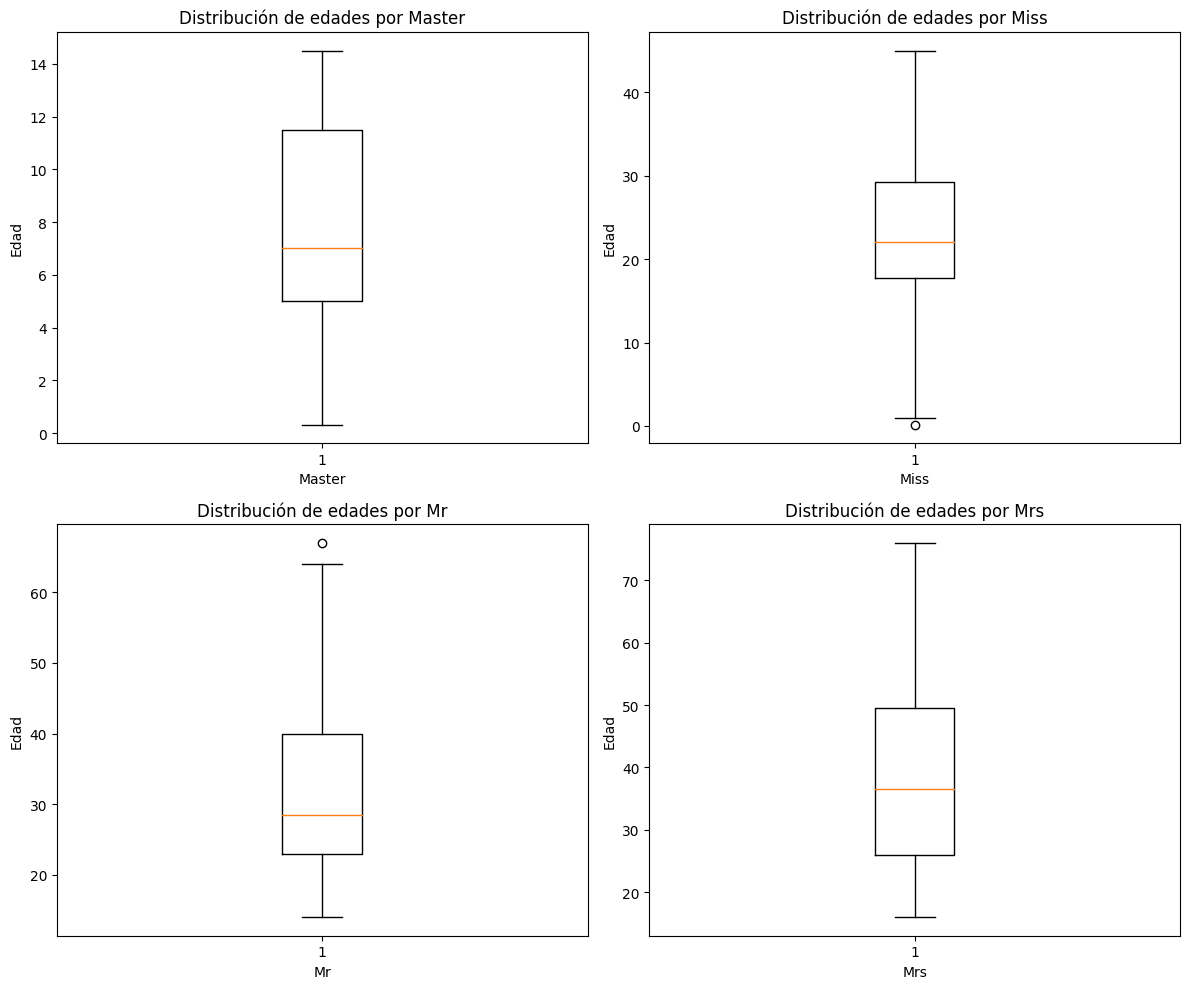

In [242]:
# Data Exploration | Identify outliers in age per titles with missing values
filtered_df = df_test[df_test['Titles'].isin(['Master', 'Miss', 'Mr', 'Mrs'])]

## Create a 2x2 grid of boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each title
titles = ['Master', 'Miss', 'Mr', 'Mrs']
for ax, title in zip(axes.flatten(), titles):
    ax.boxplot(filtered_df[filtered_df['Titles'] == title]['Age'].dropna())
    ax.set_title(f'Distribución de edades por {title}')
    ax.set_ylabel('Edad')
    ax.set_xlabel(title)

plt.tight_layout()
plt.show()

In [243]:
# Exploration | Identify measures of centrality of age by title
centrality_measures = df_test.groupby('Titles')['Age'].agg(['mean', 'median'])

print(centrality_measures)

             mean  median
Titles                   
Col     50.000000    50.0
Dona    39.000000    39.0
Dr      53.000000    53.0
Master   7.406471     7.0
Miss    21.774844    22.0
Mr      32.000000    28.5
Mrs     38.903226    36.5
Ms            NaN     NaN
Rev     35.500000    35.5


In [244]:
# Cleansing | Replace missing age values with measures of centrality
df_test.loc[(df_test['Titles'] == 'Master') & (df_test['Age'].isna()), 'Age'] = 7.4 # Mean
df_test.loc[(df_test['Titles'] == 'Miss') & (df_test['Age'].isna()), 'Age'] = 22.0 # Median
df_test.loc[(df_test['Titles'] == 'Mr') & (df_test['Age'].isna()), 'Age'] = 32.0 # Median
df_test.loc[(df_test['Titles'] == 'Mrs') & (df_test['Age'].isna()), 'Age'] = 38.9 # Mean

In [245]:
# Exploration | Identify Ms title with missing values
missing_values_dr = df_test.loc[(df_test['Titles'] == 'Ms') & (df_test.isna().any(axis=1))]
print(missing_values_dr["Name"])

PassengerId
980    O'Donoghue, Ms. Bridget
Name: Name, dtype: object


In [246]:
# Cleansing | Replace missing age of Dr. Jackson with researched value
df_test.loc[df_test['Titles'] == 'Ms', ['Age']] = df_test.loc[df_test['Titles'] == 'Ms', ['Age']].fillna(21)

'''
Encyclopedia Titanica. “Bridget Donohoe: Titanic Victim,” September 1, 1996. https://www.encyclopedia-titanica.org/titanic-victim/bridget-donohoe.html.
'''

'\nEncyclopedia Titanica. “Bridget Donohoe: Titanic Victim,” September 1, 1996. https://www.encyclopedia-titanica.org/titanic-victim/bridget-donohoe.html.\n'

In [247]:
# Preprocessing | Standarize selected features
columns_to_standardize = ["Age", 'Family_Size']
df_test[columns_to_standardize] = scaler.transform(df_test[columns_to_standardize])

In [248]:
X_test = df_test.drop(["Name", "Titles"], axis = 1).copy()
X_test.to_csv("X_test_C.csv")